# Tarea 3: Métricas para la evaluación de modelos de aprendizaje supervisado

    Para poder evaluar si nuestro modelo generaliza correctamente es necesario podemos aplicar ciertas métricas dependiendo del problema que queremos resolver y acontinuación vamos a explicar en detalle cada una de ellas.

### Integrantes:

    - Javier Vega 
    - Erick Calvo


##### Evaluación de modelos de clasificación.

     1. Matriz de confusión.
     2. Exactitud o Accuracy.
     3. Precision.
     4. Sencibilidad o Recall.
     5. Especificidad.
     6. F1 score.
     7. Curva de características operativas del receptor (ROC).
     8. Pérdida logarítmica.

##### Evaluación de modelos de regresión.

    1. Error medio absoluto.
    2. Error cuadrático medio.
    3. Raíz del error cuadrático medio.
    4. R cuadrado (coeficiente de determinación).
    5. R cuadrado ajustado.

### Metricas para modelos de clasificación

##### Matriz de confusión:
Se utiliza para representar gráficamente las predicciones de nuestro modelo. Las columnas representan el número de predicciones de cada clase, mientras que las filas son las instancias en la clase real.
En caso de que tenga solo dos clases se le conoce como matriz binaria y permite definir el conjunto de muestras que veremos a continuación apartir de los posibles cuatro resultados que arroja:
   
- Verdadero Positivo (TP): Predicho Verdadero y Verdadero en realidad.
- Verdadero Negativo (TN): Predicho Falso y Falso en realidad.
- Falso Positivo (FP): Predicción de verdadero y falso en la realidad.
- Falso Negativo (FN): Predicción de falso y verdadero en la realidad.
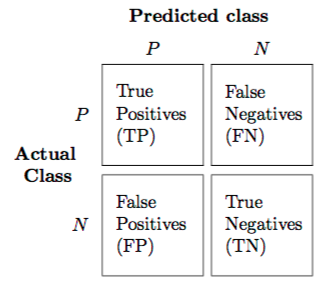

[[13  0  0]
 [ 0 17  2]
 [ 0  0 18]]


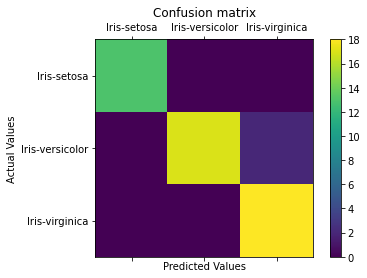

In [49]:
#Ejemplo tomado de: 
#https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico

import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline  

#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)
# df = df.values
X = df.iloc[:,0:4]
y = df.iloc[:,4]
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#Split data into train and test set. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

##### Exactitud o Accuracy:
Se define como el porcentaje de predicciones correctas hechas por el modelo, es una buena métrica de evaluación cuando las clases estan balanceadas:
   
\begin{equation}
Accuracy=\frac{TN+TP}{TN+TP+FN+FP}.
\end{equation}


In [48]:
#Ejemplo tomado de: 
#https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico


#import modules
import warnings
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
iris = datasets.load_iris()
# # Create feature matrix
X = iris.data
# Create target vector
y = iris.target
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#cross-validation settings
kfold = model_selection.KFold(n_splits=10, random_state=None)
#Model instance
model = LogisticRegression()
#Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy -val set: 94.67% (0.06)
Accuracy - test set: 92.00%


##### Precision:
Es la relación porcentual entre las predicciones positivas verdaderas y las predicciones positivas totales (incluyen las falsas positivas):
   
\begin{equation}
Precision=\frac{TP}{TP+FP}.
\end{equation}


##### Sencibilidad o Recall:
Es la relación porcentual entre las predicciones positivas verdaderas y número total de casos positivos:
   
\begin{equation}
Recall=\frac{TP}{TP+FN}.
\end{equation}


##### Especificidad:
Es la relación porcentual entre las predicciones negativas verdaderas y número total de casos negativos:
   
\begin{equation}
Specificity=\frac{TN}{TN+FP}.
\end{equation}


Cuando las clases no estan balanceadas se recomienda usar Presición o Sencibilidad en vez de Exactitud. Si la idea es enfocarnos en evitar falsos positivos podríamos optar por Presición y si por el contrario sería disminuir los falsos negativos deberiamos utilizar Sencibilidad. Sin embargo si la idea es tener un balance entre ambos podríamos optar por la siguiente métrica:

##### F1 score:
Es la combinación de las métricas de Presición y Recall o Sencibilidad:
   
\begin{equation}
F1=2*\frac{Presicion×Recall}{Presicion+Recall}.
\end{equation}


In [47]:
#Ejemplo tomado de: 
#https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico

import warnings
import pandas
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
test_size = 0.33
seed = 7

model = LogisticRegression()
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

model.fit(X_train, y_train)
pred = model.predict(X_test)

precision = precision_score(y_test, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

Precision: 0.701493
Recall: 0.552941
F1 score: 0.618421


##### Curva de características operativas del receptor (ROC):
Esta curva permite visualizar el equilibrio entre la tasa de verdaderos positivos y la tasa falsos positivos, se obtiene al trazar la tasa positiva verdadera (sensibilidad) frente a la tasa de falsos positivos (1 - especificidad).
   
\begin{equation}
ROC=\frac{Recall}{1- Specificity}.
\end{equation}

##### El área bajo la curva (AUC):
Esta dada a partir de la curva ROC y entre más alta es la AUC indica que mejor es el rendimiento del modelo para distinguir entre clases positivas y negativas.
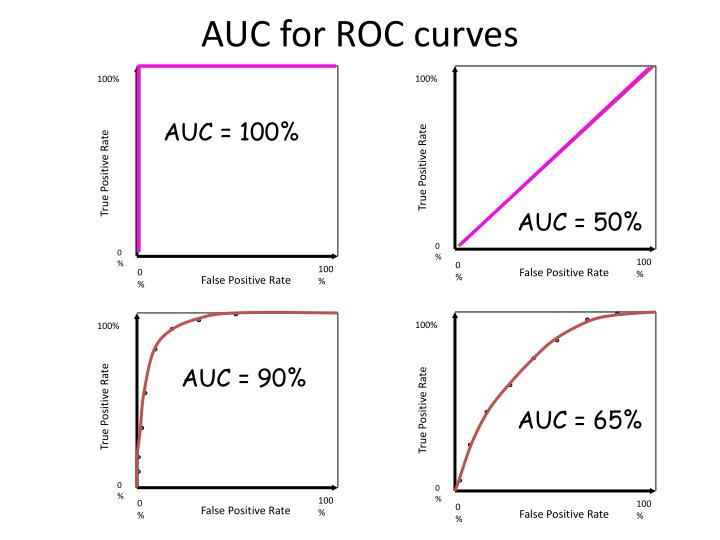

AUC - Test Set: 82.85%


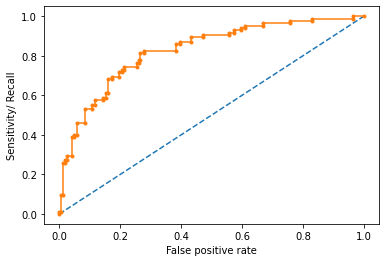

In [50]:
#Ejemplo tomado de: 
#https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico

#Classification Area under curve
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()


##### Pérdida logarítmica:
A medida que la probabilidad predicha de la clase verdadera se acerca a cero, la pérdida aumenta exponencialmente. Mide el desempeño de un modelo de clasificación en el que la entrada de la predicción es un valor de probabilidad entre 0 y 1.
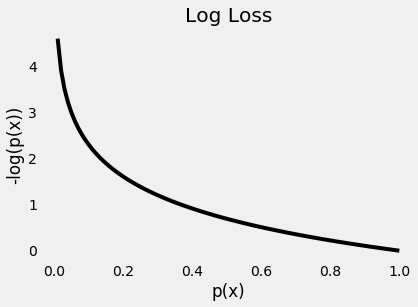

In [51]:
#Ejemplo tomado de: 
#https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico

#Classification LogLoss
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
#predict and compute logloss
pred = model.predict(X_test)
accuracy = log_loss(y_test, pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 7.89


### Metricas para modelos de regresión

##### Error medio absoluto:
Es el valor medio de la diferencia absoluta entre el valor real y el valor predicho:
   
\begin{equation}
MAE=\frac{1}{N}\sum_{i=1}^{N}|y_i−ŷ_i|
\end{equation}


In [60]:
#Ejemplo de MAE (Error medio absoluto).

from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mae = mean_absolute_error(y_true, y_pred)
mae

0.5

#####  Error cuadrático medio:
Es el valor medio de la diferencia al cuadrado entre el valor real y el predicho:
   
\begin{equation}
MSE=\frac{1}{N}\sum_{i=1}^{N}(y_i−ŷ_i)^2
\end{equation}

- Destaca grandes errores entre los pequeños.
- Ayuda a encontrar los valores mínimos y máximos utilizando los métodos matemáticos de manera más efectiva.

In [61]:
#Ejemplo de MSE (Error cuadrático medio).

from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mse = mean_squared_error(y_true, y_pred)
mse

0.375

#####  Raíz del error cuadrático medio:
Es la raíz cuadrada del error cuadrático medio:
   
\begin{equation}
RMSE=\sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i−ŷ_i)^2}
\end{equation}

- Utiliza valores absolutos más pequeños, lo que es ideal para los cálculos informáticos.

In [5]:
#Ejemplo de RMSE (Raíz del error cuadrático medio).

import numpy as np
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
rmse = np.square(mean_squared_error(y_true, y_pred))
rmse

0.140625

#####   R cuadrado (coeficiente de determinación):
Compara la media de los errores al cuadrado (MSE) de nuestro modelo con la MSE de un modelo básico que siempre devuelve como predicción la media de los valores de entrenamiento.
   
\begin{equation}
R^2=1-\frac{\sum_{i=1}^{N}(y_i−ŷ_i)^2}{\sum_{i=1}^{N}(y_i−\bar{y}_i)^2}
\end{equation}

- Tiene un problema y es que entre más variables independientes se le agreguen al modelo el cálculo de R cuadrado se queda igual o mejora, nunca empeora lo cual no siempre es correcto. Para evitar esto se utiliza la siguiente métrica.

In [63]:
#Ejemplo de R cuadrado (coeficiente de determinación).

from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2 = r2_score(y_true, y_pred)
r2

0.9486081370449679

#####   R cuadrado ajustado:
Indica que porcentaje de variación de la variable dependiente es explicado colectivamente por todas las variables independientes.
   
\begin{equation}
\bar{R}^2=1-\frac{N-1}{N-k-1}(1-R^2)
\end{equation}

- N: número de observaciones de la muestra.
- k: número de variables independientes.

In [74]:
#Ejemplo de R ajustado (coeficiente de determinación ajustado).

from sklearn. linear_model  import LinearRegression
import pandas as pd

#define la URL donde se encuentra el conjunto de datos
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"

#leer en datos
data = pd. read_csv (url)

#fit modelo de regresión model
model = LinearRegression ()
X, y = data [["mpg", "wt", "drat", "qsec"]], data.hp
model.fit(X, y)

# mostrar R cuadrado ajustado
r2a = 1 - (1-model.score(X, y)) * ( len (y) -1) / ( len (y) -X.shape [1] -1)
r2a

0.7787005290062521

### Analisis de los Modelos para un dataset en particular

> Para el ejercicio de la tarea se requiere seleccionar un dataset para poder analizar el uso en los diferentes algoritmos ya vistos 

> Escogimos un dataset que nos parecio interseante debido a los features explicados sobre todo en que signfica cada uno para poder entender que caracteristicas son mas importantes
> y que tanto puede variar el uso de uno y u otra
> El caso es predecir a travez de ciertas caracteristas exteriores particulares de un conjunto de de tipos de hongos si son venenosos o no

##### Librerías de Python requeridas:

    A continuación se presentan la lista de librerías que se requieren para llevar a cabo las tareas de preprocesamiento solicitadas:
        1. pandas
        2. numpy
        3. sklean
        4. torch
        5. matplotlib
        6. seaborn

In [6]:
#Importar todas las librerias requeridas

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch 
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

##### Carga de Datos:

    Se cargan los datos del dataset de mushroom.csv

In [7]:
#Cargar los datos 

hongos_dt = pd.read_csv("mushrooms.csv")

##### Visualización de Datos:

    Se visualizan las primeras filas de datos del datase, se puede hacer una visualizacion rapida
    atravez de la funcion head, que recibe como parametro la cantidad de registros que despliegan 

In [8]:
#Visualización de datos:

hongos_dt.head(200)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,e,f,f,g,f,n,f,c,n,g,...,s,w,w,p,w,o,p,n,y,u
196,e,b,s,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,s,g
197,e,x,s,w,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,m
198,e,x,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m


##### Descripcion de las caracteristicas

##### Attribute Information: (classes: edible = e, poisonous = p)

1. cap-shape: bell = b, conical = c,convex = x, flat = f, knobbed = k, sunken = s
2. cap-surface: fibrous = f, grooves = g, scaly = y, smooth = s
3. cap-color: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
4. bruises: yes = t, no = f
5. odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
6. gill-attachment: attached = a, descending = d, free = f, notched = n
7. gill-spacing: close = c, crowded = w, distant = d
8. gill-size: broad = b, narrow = n
9. gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w ,yellow = y
10. stalk-shape: enlarging = e, tapering = t
11. stalk-rootbulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
12. stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s
13. stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s
14. stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
15. stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
16. veil-type: partial = p, universal = u
17. veil-color: brown = n, orange = o, white = w, yellow = y
18. ring-number: none = n, one = o, two = t
19. ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
20. spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o,purple = u, white = w, yellow = y
21. population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
22. habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

##### Descripcion grafica de las caracteristicas

<img src="morphology.jpg">

##### Análisis exploratorio de Datos:

    La idea es poder visualizar los datos, es importante tener una idea de lo que se requiere analizar, en este caso con las caracteristicas visibles como forma, color de las partes o su distribucion en la naturaleza se trata de predecir si es o no venenoso.

In [9]:
#Visualización de las principales estadísticas del dataset.

hongos_dt.head(200)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,e,f,f,g,f,n,f,c,n,g,...,s,w,w,p,w,o,p,n,y,u
196,e,b,s,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,s,g
197,e,x,s,w,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,m
198,e,x,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m


forma del dataset

In [10]:
hongos_dt.shape

(8124, 23)

un dataset de 8124 filas por 23 columnas

    Revisando los datos podemos darnos cuenta que el set presenta algunos problemas, hay algunos atributos que estan en formato de texto, que se puede categorizar por numero por ejemplo el atributo de class (p,e) entre comestible y no comestible

##### Pasar los atributos texto a número:

    En este caso como podemos observar el dataset contiene algunas columnas que tienen valores tipo texto las cuales debemos convertir en valores númericos:
        1. La idea sería cambiar mediante OrdinalEncoder de sklearn.

##### Utilización de LabelEncoder:

    A continuación se muestra como se utiliza OrdinalEncoder de sklearn para cambiar los valores de los atributos de tipo texto a número.


In [12]:
# Utilizar OrdinalEncoder de sklearn para cambiar los datos a datos numéricos

from sklearn.preprocessing import LabelEncoder
hongos_encoded = hongos_dt.apply(LabelEncoder().fit_transform)



In [13]:
#en este caso para la columna agente se elimina datos Nan
hongos_encoded = hongos_encoded.dropna() 
#visualizacion despues de los cambios


### Mapa de Correlacion
##
> Es una herramienta gráfica que permite demostrar la relación existente entre dos clases de datos y cuantificar la intensidad de dicha relación. 
>
> Se utiliza para conocer si efectivamente existe una correlación entre dos magnitudes o parámetros de un problema y, en caso positivo, de qué tipo es la correlación

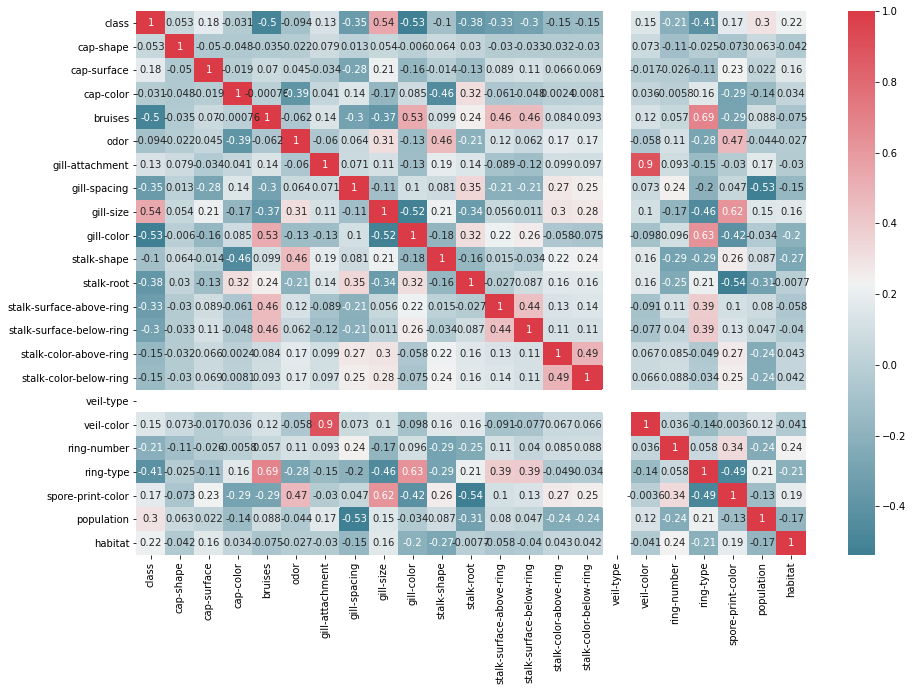

In [64]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df1.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(hongos_encoded)

### PairPlot
>Esta función crea una cuadrícula de ejes de modo que cada variable numérica en los datos se compartirá entre los ejes y en una sola fila y los ejes x en una sola columna

In [ ]:
sns.pairplot(hongos_encoded.iloc[:,1:15])

##### Separacion de Columnas Features y Targets

Despues del Analizis nos damos cuenta que la columna class que distingue entre comestible y no comestible seria nuestra columna target y las demas columnas target

In [65]:
hongos_features = hongos_encoded.iloc[:, 1:33]

In [66]:
hongos_features.head(100)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,3,3,1
96,2,3,4,1,3,1,0,0,7,0,...,3,7,7,0,2,1,4,3,3,1
97,5,2,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
98,0,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,3,3,1


In [67]:
hongos_target = hongos_encoded['class']
print(hongos_target)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32


##### Normalizacion de datos:
## 
>Normalizacion es una tecnica aplicada para la preparacion de datos, el objetivo es cambiar los valores de columnas numericas en un datase a una escala 
>
>comun, y asi evitar distorciones en el rango de valores 


Visualizacion para ver los datos antes de la normalizacion

Normalizemos el dataframe para ver como cambia la relacion de los datos

In [20]:
def normalizacion_max_min(df):
    
    df_scaled = df.copy() # se realiza una copia del dataframe
    # se aplica max min 
    for column in df_scaled.columns: # por cada columna del dataframe
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max() #aplicar la normalizacion
    return df_scaled

hongos_df_norm = normalizacion_max_min(hongos_features)






Otra funcion que es util para analizar datos es el uso de **describe** lo cual nos muetra stadisticas como avg, mean, std

In [21]:
#Visualización de las principales estadísticas del dataset.

hongos_df_norm.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,0.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.669621,0.609224,0.500520,0.415559,0.518095,0.974151,0.161497,0.309207,0.437335,0.567208,...,0.534548,0.727043,0.724335,NaN,0.655178,0.534712,0.572994,0.449594,0.728804,0.251436
std,0.320866,0.409958,0.282869,0.492848,0.262966,0.158695,0.368011,0.462195,0.321851,0.495493,...,0.225325,0.237718,0.238411,NaN,0.080890,0.135532,0.450418,0.297833,0.250416,0.286663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.333333,0.000000,0.250000,1.000000,0.000000,0.000000,0.181818,0.000000,...,0.333333,0.750000,0.750000,NaN,0.666667,0.500000,0.000000,0.250000,0.600000,0.000000
50%,0.600000,0.666667,0.444444,0.000000,0.625000,1.000000,0.000000,0.000000,0.454545,1.000000,...,0.666667,0.875000,0.875000,NaN,0.666667,0.500000,0.500000,0.375000,0.800000,0.166667
75%,1.000000,1.000000,0.888889,1.000000,0.625000,1.000000,0.000000,1.000000,0.636364,1.000000,...,0.666667,0.875000,0.875000,NaN,0.666667,0.500000,1.000000,0.875000,0.800000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
